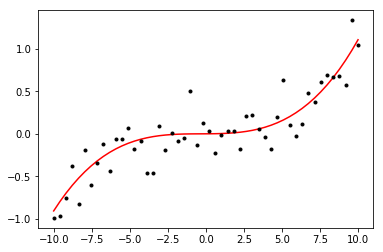

In [33]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

X = np.linspace(-10,10,50)
Y_gt = 0.001 *(X * X * X + X * X + X)
Y = Y_gt + np.random.normal(0, 0.2 ,len(X))

poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X[:,np.newaxis])

plt.plot(X, Y_gt, color='r')
plt.plot(X, Y, '.',color='k')
plt.show()

L1(Lasso)
[0.00000000e+00 1.58422963e-02 7.60296135e-04 4.40919979e-04
 0.00000000e+00 4.71324435e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
L2(Ridge)
[ 0.00000000e+00  1.66497787e-02 -2.16273525e-02  8.30204886e-04
  1.42434253e-03 -1.76482028e-05 -3.34333360e-05  3.73679859e-07
  3.35511078e-07 -1.89249760e-09 -1.21911141e-09]


/Users/suzukiyamato/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.462240e-22
  overwrite_a=True).T


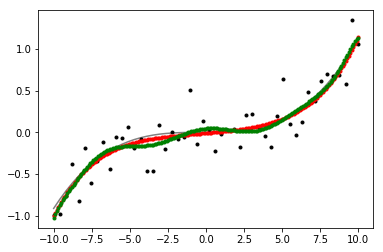

In [55]:
from sklearn import linear_model

# 1. Lasso,Ridge の結果wプロットして見てみる
# 2. alphaの値を増減した時にグラフがどう変わるかを見る
# 3. coef_の値を見て、LassoとRidgeでどう違うか確認する
# 4. データの件数やノイズを増減させて見て結果がどう変わるかを見る

xs = np.linspace(-10,10,200)

model_lasso = linear_model.LassoLars(alpha =0.001)
model_lasso.fit(X_poly, Y)
Y_lasso = model_lasso.predict(poly.fit_transform(xs[:,np.newaxis]))
print('L1(Lasso)')
print(model_lasso.coef_)

model_ridge = linear_model.Ridge(alpha=0.1)
model_ridge.fit(X_poly, Y)
Y_ridge = model_ridge.predict(poly.fit_transform(xs[:,np.newaxis]))
print('L2(Ridge)')
print(model_ridge.coef_)

p = plt.subplot()
p.plot(X, Y_gt, color='grey', label='grund truth')
p.plot(X, Y, '.', color='k')
p.plot(xs, Y_lasso, '.', color ='r', label='Lasso')
p.plot(xs, Y_ridge, '.', color ='g', label='Ridge')
plt.show()

Data Augmentation